## 이상치의 의미

## 이상치 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_1', 1: 'class_2', 2: 'class_3'})

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-alu9ljoe because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Class'],
      dtype='object')

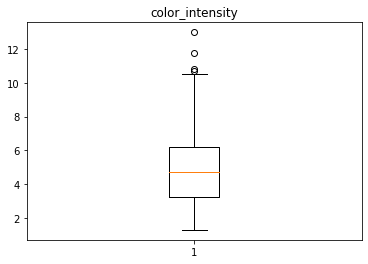

In [3]:
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title("color_intensity")
plt.show()

In [4]:
import numpy as np
def outliers_iqr(dt, col):
    qurtile_1, qurtile_3 = np.percentile(dt[col], [25, 75])
    iqr = qurtile_3 - qurtile_1
    lower_whis = qurtile_1 - (iqr * 1.5)
    upper_whis = qurtile_3 + (iqr * 1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]
outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


## 이상치 정제

**(1) 이상치 제거**

In [5]:
drop_outliers = wine.drop(index=outliers.index)

print(f'Original: {wine.shape}')
print(f'Drop outliers: {drop_outliers.shape}')

Original: (178, 14)
Drop outliers: (174, 14)


**(2) 이상치 대체**

In [6]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine.loc[outliers.index, 'color_intensity'] 

151   NaN
158   NaN
159   NaN
166   NaN
Name: color_intensity, dtype: float64

In [7]:
wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity'] 

151   NaN
158   NaN
159   NaN
166   NaN
Name: color_intensity, dtype: float64